# Bayesian Modeling with Poisson Distribution

More than 90% from [Intro. to Bayesian Modeling with PyMC3, 2017](https://juanitorduz.github.io/intro_pymc3/)

## Poisson Distribution

$$
        Y \sim \mathrm{Poisson}(\lambda)
$$

**PMF/PDF**
$$
    f(y|\lambda) = \frac{\lambda^y e^{-\lambda}}{y!} \quad\mbox{where}\quad \lambda > 0
$$
**Expectation**
$$
\mathbb{E}(Y) = \lambda = Var(Y)
$$

In [9]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [5]:
# Set random seed so that the results are re-produciable.

np.random.seed(5)

n = 100
lam_true = 2  # average rate of the discrete numbers

# let's make a random sample
y = stats.poisson(lam_true).rvs(n)
y

array([2, 4, 1, 0, 2, 2, 2, 2, 1, 1, 3, 2, 0, 1, 3, 3, 4, 2, 0, 0, 3, 6,
       1, 2, 1, 2, 5, 2, 3, 0, 1, 3, 1, 4, 1, 2, 4, 0, 6, 4, 1, 2, 2, 0,
       1, 2, 4, 4, 1, 3, 0, 3, 3, 2, 4, 2, 2, 1, 1, 2, 5, 2, 3, 0, 1, 1,
       1, 3, 4, 1, 3, 4, 2, 1, 2, 4, 2, 2, 1, 0, 2, 2, 3, 0, 3, 3, 4, 2,
       2, 1, 2, 1, 3, 0, 1, 0, 3, 3, 1, 2])

In [6]:
y.mean()

2.06

[13 24 29 18 12  2  2  0  0] (9,) [0 1 2 3 4 5 6 7 8 9] (10,)
(10,) (9,)


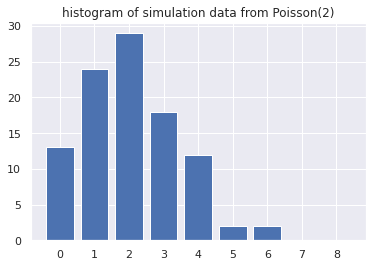

In [29]:
x = np.arange(10)
hist, r = np.histogram(y, bins=x)
print(hist, hist.shape, r, r.shape)
print(x.shape, hist.shape)
plt.bar(x[:-1], hist)
plt.xticks(x[:-1]);
plt.title(f'histogram of simulation data from Poisson({lam_true})');

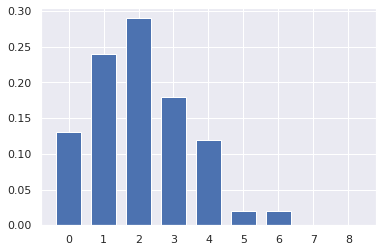

In [37]:
plt.hist(y, density=True, bins=np.arange(-.5, 9.5, 1), rwidth=.7);
plt.xticks(np.arange(9));

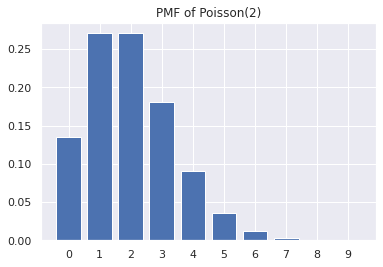

In [43]:
x = np.arange(10)
plt.bar(x, stats.poisson(lam_true).pmf(x));
plt.title(f'PMF of Poisson({lam_true})');
plt.xticks(x);

The sample distribution above is different from the PMF. It is because we used samples. You should try:
1. multiple cases of samples to examine the variation of histograms
1. and see the change due to the increment of the number of samples.

## [Gamma Distribution](https://en.wikipedia.org/wiki/Gamma_distribution)

$$
    \lambda \sim \Gamma(a, b) = \mathrm{Gamma}(a, b)
$$

**PDF**
$$
    f(\lambda) = \frac{b^a}{\Gamma(a)} \lambda^{a-1} e^{-b\lambda}
$$

- $a > 0$: the shape paramter
- $b > 0$: the rate paramter
- $\theta = 1/b$: the scale paramter

**Expection**
$$
\mathbb{E}(\lambda) = \frac{a}{b} \quad\mbox{and}\quad Var(\lambda) = \frac{a}{b^2}
$$

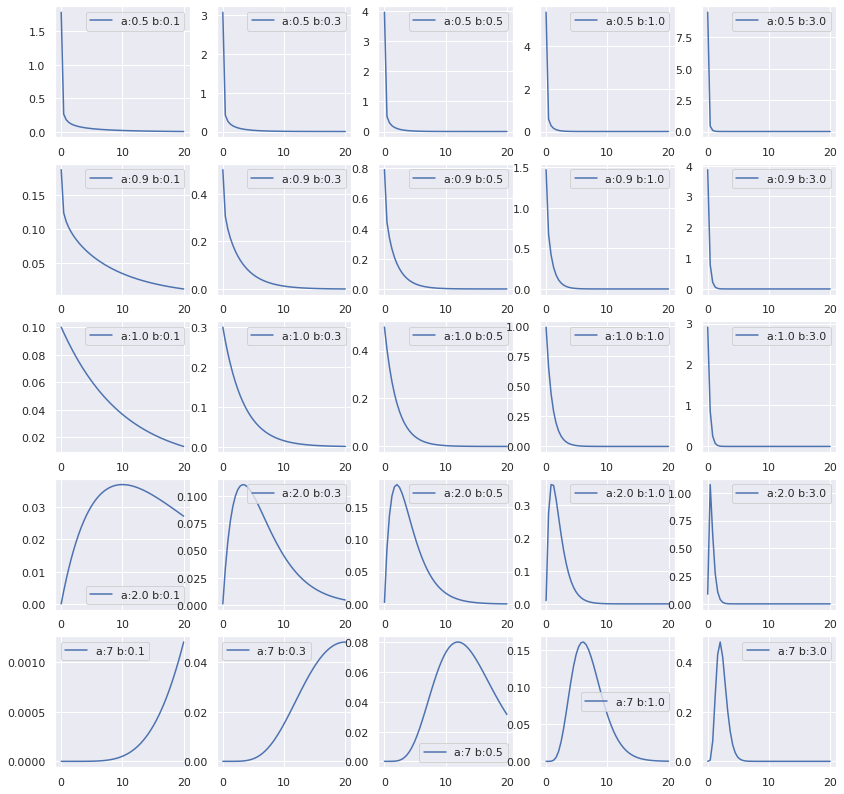

In [58]:
import itertools

shapes = [.5, .9, 1., 2., 7]
rates = [.1, .3, .5, 1., 3.]
fig, axes = plt.subplots(len(shapes), len(rates), figsize=(14, 14))

for i in range(len(shapes)):
    for j in range(len(rates)):
        a, b = shapes[i], rates[j]
        ax = axes[i,j]
        x = np.linspace(0.01, 20, 50)
        ax.plot(x, stats.gamma(a=a, scale=1/b).pdf(x), label=f'a:{a} b:{b}')
        ax.legend()

## Posterior Distribution

$$
    f(\lambda|y_1, ..., y_n) = \mathrm{Gamma}(\sum y_i + a, n + b)
$$

## Computational Statistics with MCMC

My idea is to model the prior as Gamma(a=3.5, b=2).

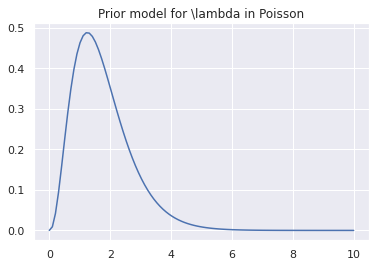

In [63]:
a = 3.5
b = 2

x = np.linspace(0, 10, 100)
plt.plot(x, stats.gamma(a=a, scale=1/b).pdf(x));
plt.title('Prior model for \lambda in Poisson');

In [68]:
import pymc3 as pm
import arviz as az  # plotting tool 

model = pm.Model()

with model:
    # define the prior model of yours
    a = 3.5
    b = 2
    lam = pm.Gamma('lambda', alpha=a, beta=b)
    y_obs = pm.Poisson('yobs', mu=lam, observed=y)

In [69]:
with model:
    trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lambda]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


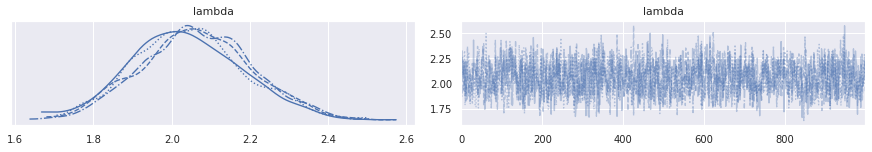

In [71]:
with model:
    pm.traceplot(trace)

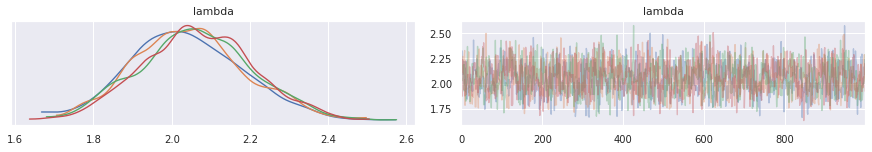

In [72]:
with model:
    az.plot_trace(trace)

What if we have no idea about the prior distribution on $\lambda$?

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lambda]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


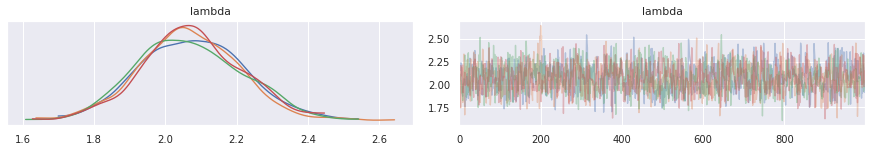

In [74]:
import pymc3 as pm
import arviz as az  # plotting tool 

modelu = pm.Model()

with modelu:
    # define the prior model of yours
    lam = pm.Uniform('lambda', lower=1, upper=3)
    y_obs = pm.Poisson('yobs', mu=lam, observed=y)
    traceu = pm.sample()
    
    az.plot_trace(traceu)

Too wide is the prior distribution?

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lambda]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


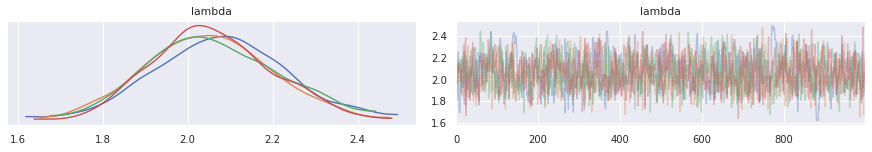

In [76]:
modeluu = pm.Model()

with modeluu:
    # define the prior model of yours
    lam = pm.Uniform('lambda', lower=1.5, upper=2.5)
    y_obs = pm.Poisson('yobs', mu=lam, observed=y)
    traceuu = pm.sample()
    
    az.plot_trace(traceuu)

More tight prior?

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lambda]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


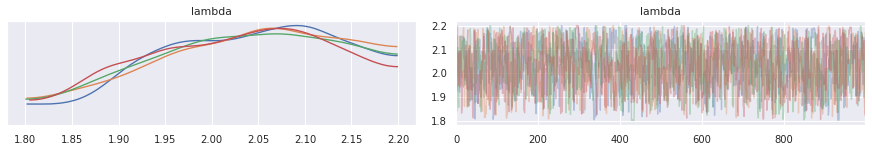

In [77]:
with pm.Model() as modeluuu:
    # define the prior model of yours
    lam = pm.Uniform('lambda', lower=1.8, upper=2.2)
    y_obs = pm.Poisson('yobs', mu=lam, observed=y)
    traceuuu = pm.sample()
    
    az.plot_trace(traceuuu)

---

## 3. Bayesian Hierarchical Modeling - Chocolate Cookie

From [Bayesian Statistics: Techniques and Models](https://www.coursera.org/learn/mcmc-bayesian-statistics).

### 3.1 The data

A company is selling chocolate cookies around the world. It has five factories worldwide. 

The recipe is unique and should be.

- The number of chocolate chips in the cookies are supposed to be the same or similar.
- A few of ph.d researchers counted the number of choco chips and found that they are actually not the same.
- The distribution of the number of chco chips for a cookie can be calculated.
- One researcher of the team observes that the five distributions from those five factories are all different. God bless him.
- Question
    - how to model the distribution of the number of choco chips per a cookie
    - (prediction) what is the probability that that next cookie from the factory in the north pole (or factory 1) has less than 7 choco chips?
    - Now a new factory, the sixth, is going to be built in the south pole. What is the probability that it may have average rate of $\lambda$ > 15?
    - What is the predicted percentage of cookies that have more than 15 choco chips?